In [76]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from scipy.stats import pointbiserialr

In [77]:
df = pd.read_csv('/Users/biraj/Desktop/Github/flight-prediction-api/datasets/Flights_2021/final_dataset-add.csv')
df.shape

(538040, 37)

In [78]:
df.columns

Index(['Unnamed: 0', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'FlightDate', 'Marketing_Airline_Network', 'Operating_Airline ',
       'OriginAirportID', 'Origin', 'DestAirportID', 'Dest', 'CRSDepTime',
       'DepTime', 'DepDelayMinutes', 'DepDel15', 'TaxiIn', 'CRSArrTime',
       'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'DistanceGroup',
       'CombinedDateTime', 'ScaledCRSDepTime', 'temperature_2m',
       'relative_humidity_2m', 'dew_point_2m', 'precipitation', 'rain',
       'snowfall', 'weather_code', 'surface_pressure', 'cloud_cover',
       'wind_speed_10m', 'wind_direction_10m', 'wind_direction_100m'],
      dtype='object')

In [79]:
df.drop(columns=["FlightDate",
                 "OriginAirportID",
                 "DestAirportID",
                 "CRSArrTime",
                 "Unnamed: 0",
                 "CombinedDateTime",
                 "ScaledCRSDepTime"],
        inplace=True)

In [80]:
df.columns

Index(['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operating_Airline ', 'Origin', 'Dest',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDel15', 'TaxiIn',
       'ArrTime', 'ArrDelayMinutes', 'ArrDel15', 'DistanceGroup',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'snowfall', 'weather_code', 'surface_pressure',
       'cloud_cover', 'wind_speed_10m', 'wind_direction_10m',
       'wind_direction_100m'],
      dtype='object')

In [81]:
df = df[df['ArrDel15'].notna()]

In [82]:
for col in df.columns:
    if df[col].isna().sum()>0:
        print(col)

In [83]:
airportLabel = [
    {"id": 0, "code": "BWI"},
    {"id": 1, "code": "CLT"},
    {"id": 2, "code": "DEN"},
    {"id": 3, "code": "DFW"},
    {"id": 4, "code": "DTW"},
    {"id": 5, "code": "IAH"},
    {"id": 6, "code": "LAX"},
    {"id": 7, "code": "MDW"},
    {"id": 8, "code": "ORD"},
    {"id": 9, "code": "PHL"},
    {"id": 10, "code": "PHX"},
    {"id": 11, "code": "SEA"},
    {"id": 12, "code": "SFO"},
    {"id": 13, "code": "SLC"}
]

airport_mapping = {airport['code']: airport['id'] for airport in airportLabel}


# Replace Origin and Dest columns with corresponding ids
df['Origin'] = df['Origin'].map(airport_mapping)
df['Dest'] = df['Dest'].map(airport_mapping)


# labelEncoder = LabelEncoder()
# df["Origin"] = labelEncoder.fit_transform(df["Origin"])
# df["Dest"] = labelEncoder.fit_transform(df["Dest"])



In [84]:
df['Origin']

0          3
1          3
2          3
3          3
4          3
          ..
538035     5
538036     9
538037    12
538038    12
538039    10
Name: Origin, Length: 536982, dtype: int64

In [85]:
X = df[["Year", "Quarter", "DayofMonth", "Origin", "Dest", "CRSDepTime", "DepDel15", 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'precipitation', 'rain', 'snowfall', 'weather_code', 'surface_pressure','cloud_cover', 'wind_speed_10m','wind_direction_100m']]
y =  np.array(df.loc[:, df.columns == "ArrDel15"]["ArrDel15"])

model = RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=42, n_jobs=-1)

model.fit(X, y)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42)

In [86]:
importances = model.feature_importances_
importances

array([0.        , 0.01021121, 0.03090662, 0.01441893, 0.08932118,
       0.11502545, 0.40943111, 0.04992138, 0.04436805, 0.0469559 ,
       0.00492139, 0.00433108, 0.00136006, 0.00946815, 0.04877464,
       0.03072501, 0.04474903, 0.04511081])

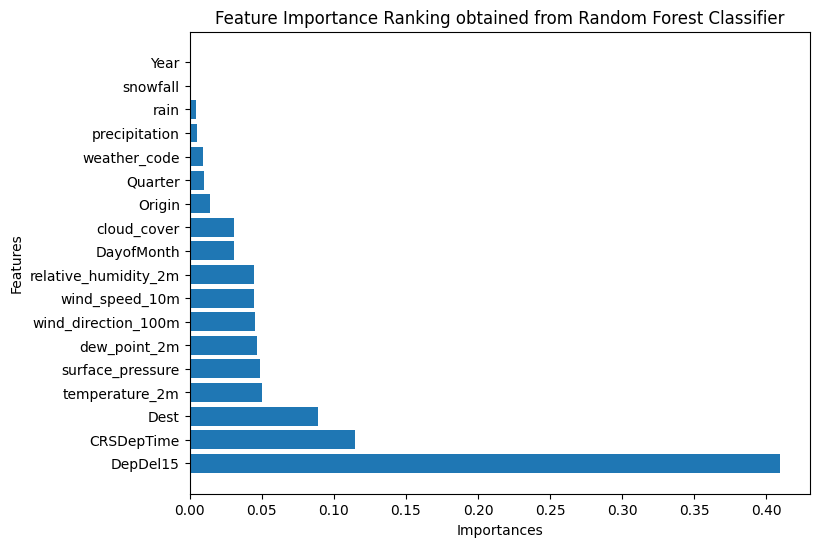

In [87]:
importances = pd.DataFrame({
    "Feature": list(X.columns),
    "Importance": model.feature_importances_
})
importances = importances.sort_values(by="Importance", ascending=False)
importances = importances.set_index("Feature")
importances
plt.figure(figsize=(8, 6))
plt.barh(importances.index, importances.Importance)
plt.title("Feature Importance Ranking obtained from Random Forest Classifier", fontsize=12)
plt.xlabel("Importances")
plt.ylabel("Features")
plt.show()

In [88]:
# labelEncoder = LabelEncoder()
# df["Origin"] = labelEncoder.fit_transform(df["Origin"])
# df["Dest"] = labelEncoder.fit_transform(df["Dest"])
# df[["Origin", "Dest"]]

In [89]:
print(f"\nDataset shape: {df.shape}")
X_train, X_test, y_train, y_test = train_test_split= train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X train shape: {X_train.shape} | Y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape} | Y test shape: {y_test.shape}")


Dataset shape: (536982, 30)
X train shape: (375887, 18) | Y train shape: (375887,)
X test shape: (161095, 18) | Y test shape: (161095,)


/Users/biraj/yes/envs/env-ait-ml/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


=========Classification report=======
Report:                precision    recall  f1-score   support

         0.0       0.91      0.96      0.93    133205
         1.0       0.75      0.53      0.62     27890

    accuracy                           0.89    161095
   macro avg       0.83      0.75      0.78    161095
weighted avg       0.88      0.89      0.88    161095



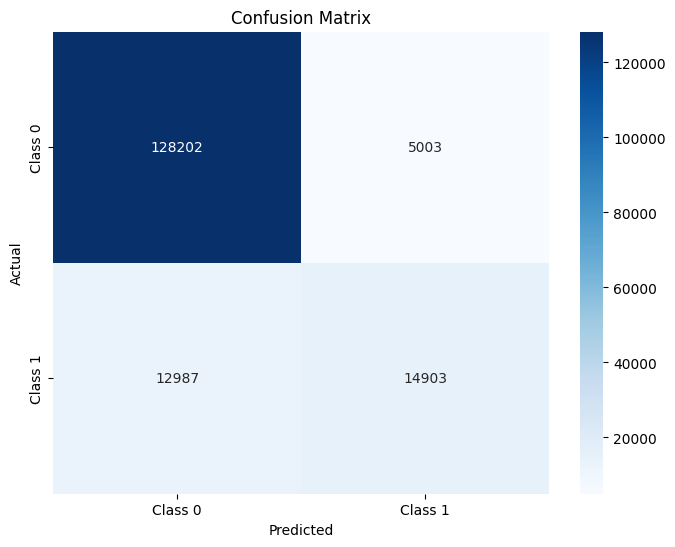

In [90]:
model = LogisticRegression(max_iter = 300,n_jobs=-1)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))


# Plot confusion matrix
cm = confusion_matrix(y_test, yhat)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()